# **Exploratory Data Analysis (EDA): Data-driven insights for HR**

## Description and Purpose

This project involves analysis of a dataset in order to provide insights to a company's Human Resources (HR) department. Specificially, it seeks to identify factors which have contributed to employee turnover. What is likely to cause an employee to leave the company?

### The sample HR dataset

The dataset comes from [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Importing packages

This project will use numpy and pandas for data manipulation, and matplotlib and seaborn for visualization.

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

### Loading dataset

Pandas is used to read the dataset, titled **`HR_dataset.csv`.**

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_dataset.csv")

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration

- Initial EDA
- Data cleaning (identify missing data, redundant data, outliers)



### Gathering basic information about the data

In [4]:
# Display basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gathering descriptive statistics about the data

In [5]:
# Display descriptive statistics
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Standardizing columns

Standardizing column names so that they are all in snake case, correcting a misspelled column name, and renaming some columns according to preference.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'number_project': 'number_of_projects',
                          'time_spend_company': 'tenure_years',
                          'Department': 'department'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'tenure_years', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Checking for missing values

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
tenure_years             0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data.

### Checking for duplicates

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

There are 3,008 rows with duplicates; around 20% of the data.

In [34]:
# Inspect some rows with duplicates
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure_years,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


Given the nature of the data, it is highly unlikely for identical rows to be legitimate entries.

In [11]:
# Drop duplicates
df1 = df0.drop_duplicates(keep='first')

df1.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure_years,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check for outliers

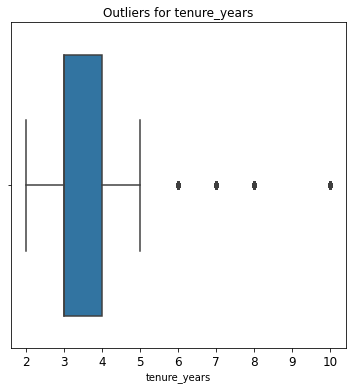

In [35]:
# Make a boxplot to visualize distribution of `tenure_years` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Outliers for tenure_years', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure_years'])
plt.show()

There are outliers in the tenure_years variable.

It may be helpful to see how many rows contain outliers in the tenure_years column.

In [16]:
# Compute the 25th and 75th percentiles and interquartile range for `tenure_years`
percentile25 = df1['tenure_years'].quantile(0.25)
percentile75 = df1['tenure_years'].quantile(0.75)
iqr = percentile75 - percentile25

# Define the upper and lower limits for `tenure_years`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify how many rows contain outliers for `tenure_years`
outliers = df1[(df1['tenure_years'] > upper_limit) | (df1['tenure_years'] < lower_limit)]
print("Number of rows in the data containing outliers in `tenure_years`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure_years`: 824


### Determine the proportion of employees who left

In [17]:
# Get numbers and percentages of employees who left
print(df1['left'].value_counts())
print()

print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


16.6% of employees captured in the dataset left the company.

### Data visualizations

Next, I'll examine relevant variables via visualizations to explore potential relationships.

First, let's look at average monthly hours worked by number of projects. Both a box plot and histogram will be used side-by-side for a better representation of the data, since a box plot alone would not accurately represent sample sizes.

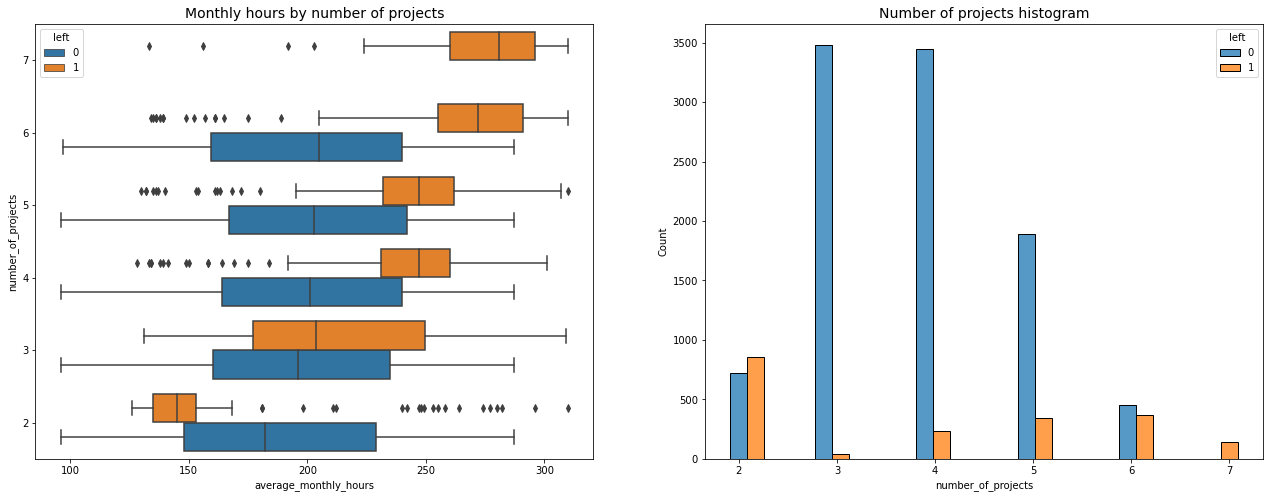

In [19]:
# Set figure and axes for two side-by-side subplots
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create the boxplot. Showing `average_monthly_hours` based on `number_of_projects`, color-coded for employees who stayed vs left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_of_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create the histogram. Showing `number_of_projects`, color-coded for employees who stayed vs left
tenure_stay = df1[df1['left']==0]['number_of_projects']
tenure_left = df1[df1['left']==1]['number_of_projects']
sns.histplot(data=df1, x='number_of_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

**Observations:**

1. Mean hours worked increases with number of projects.

2. A high number of employees with two projects left the company, and they worked less hours.

3. Everyone with seven projects left the company.

4. Those who left the company and had six to seven projects tended to work more hours than anyone else.

5. The optimal number of projects seems to be 3&ndash;4. The ratio of left/stayed is very small in this range.

6. On average, employees with three or more projects worked more than normal hours*.

\*Normal hours: Assuming a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month is **166.67 hours**.

`50 weeks * 40 hours per week / 12 months = 166.67 hours per month`

In [40]:
# Count how many employees had 7 projects
df1[df1['number_of_projects'] == 7].shape[0]

145

In [39]:
# Confirm all employees with 7 projects left by counting how many of these left the company
df1[df1['number_of_projects']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

Next, I'll make a scatterplot to examine satisfaction levels vs average monthly hours worked.

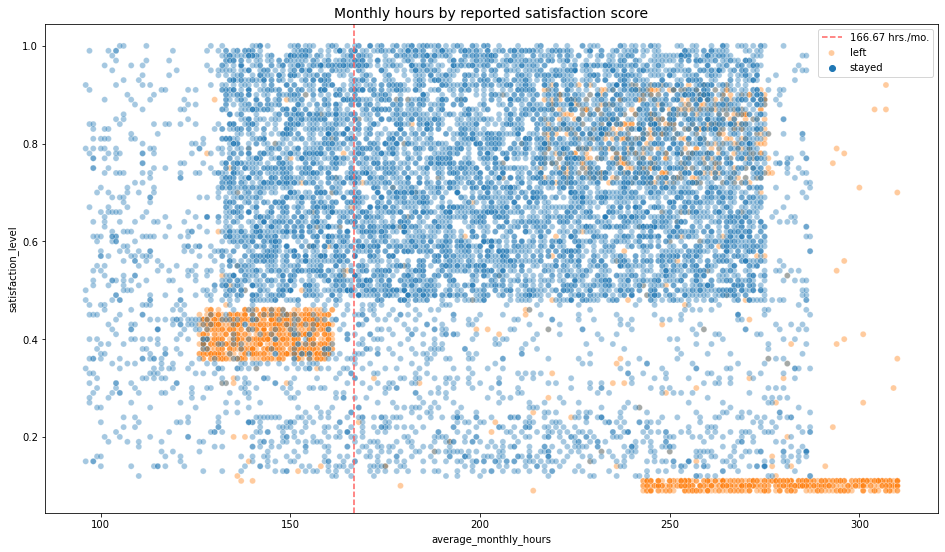

In [25]:
# Create the scatterplot. Show `average_monthly_hours` vs `satisfaction_level`, color-coding employees who stayed vs left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by reported satisfaction score', fontsize='14');

**Observations:**

1. A very large portion of employees work over the normal number of hours per month.

2. There is a notable group of employees who left who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. Their satisfaction levels were close to zero.

3. There is another notable group of employees who left who had more normal working hours; ~125&ndash;160 hours per month. They still reported low satisfaction.

4. There is another notable group of employees who left who worked ~210&ndash;280 hours per month, though they reported higher satisfaction levels. 

5. The odd shape of the distributions here is indicative of manipulated or synthetic data. If this were an actual project scenario, this would merit investigation.

Next, I'll visualize satisfaction levels by tenure using a similar set of boxplot and histogram as before.

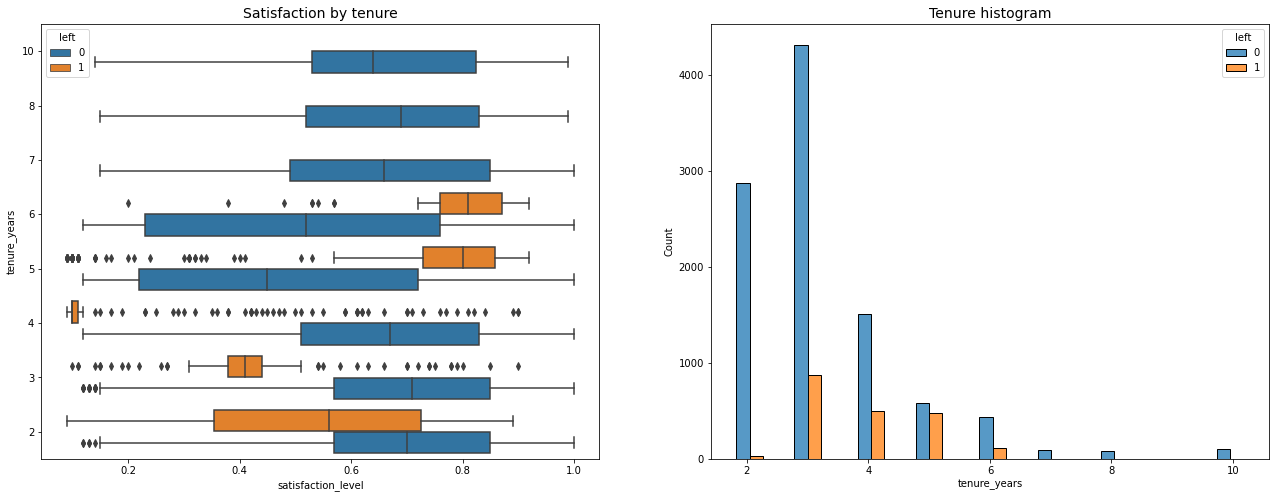

In [24]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create the boxplot. Show `satisfaction_level` by tenure, color-coded for employees who stayed vs left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure_years', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create the histogram. Show `tenure_years`, color-coded for employees who stayed vs left
tenure_stay = df1[df1['left']==0]['tenure_years']
tenure_left = df1[df1['left']==1]['tenure_years']
sns.histplot(data=df1, x='tenure_years', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

**Observations:**

1. Employees with seven or more years of tenure stayed with the company. All who left had six or less years of tenure.

2. There are very few longer-tenured employees.

3. Employees who stayed with low tenure and employees who stayed with high tenure reported similar levels of satisfaction. A dip in satisfaction among employees who stayed occurred between five and six years.

4. Employees who left fall into two general categories: employees with shorter tenures who were dissatisfied, and employees with medium-length tenures who were quite satisfied.

5. Four-year employees who left seem to have an unusually low satisfaction level. 

Next, I'll calculate the mean and median satisfaction scores of employees who left vs those who stayed.

In [26]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The mean and median satisfaction scores of employees who left are lower than those of employees who stayed.
Among employees who stayed, the satisfaction levels are skewed lower.

Next, I'll examine salary levels for different tenures.

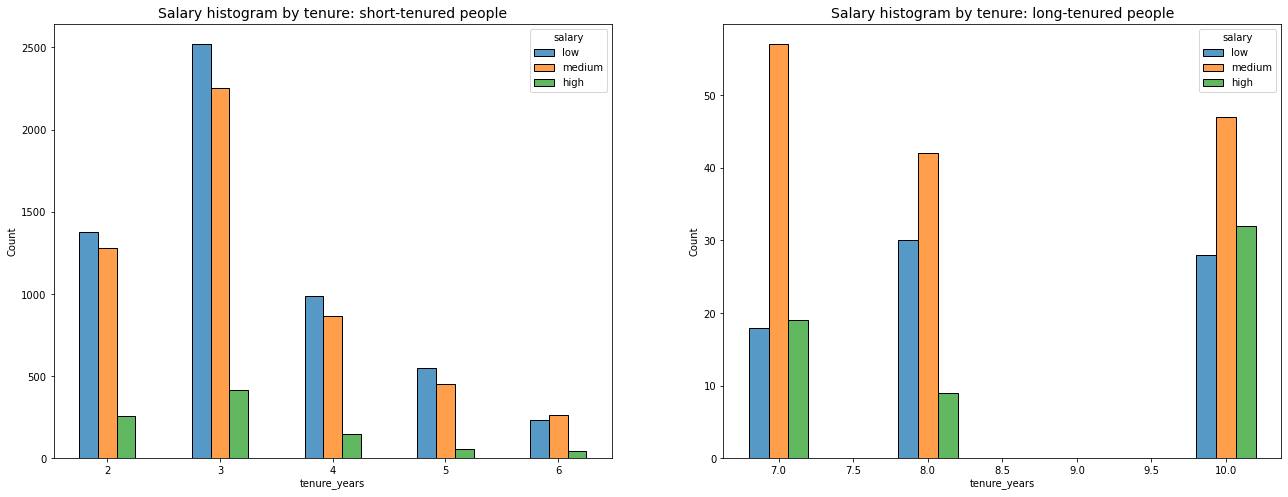

In [27]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short- and long-tenured employees
tenure_short = df1[df1['tenure_years'] < 7]
tenure_long = df1[df1['tenure_years'] > 6]

# Plot short- and long-tenured histograms separately for visibility
sns.histplot(data=tenure_short, x='tenure_years', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')


sns.histplot(data=tenure_long, x='tenure_years', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

**Observation:** Long-tenured employees tended to be expectedly higher-paid, but not disproportionately so.

Next, I'll use a scatterplot to explore whether there's a correlation between working long hours and receiving high evaluation scores.

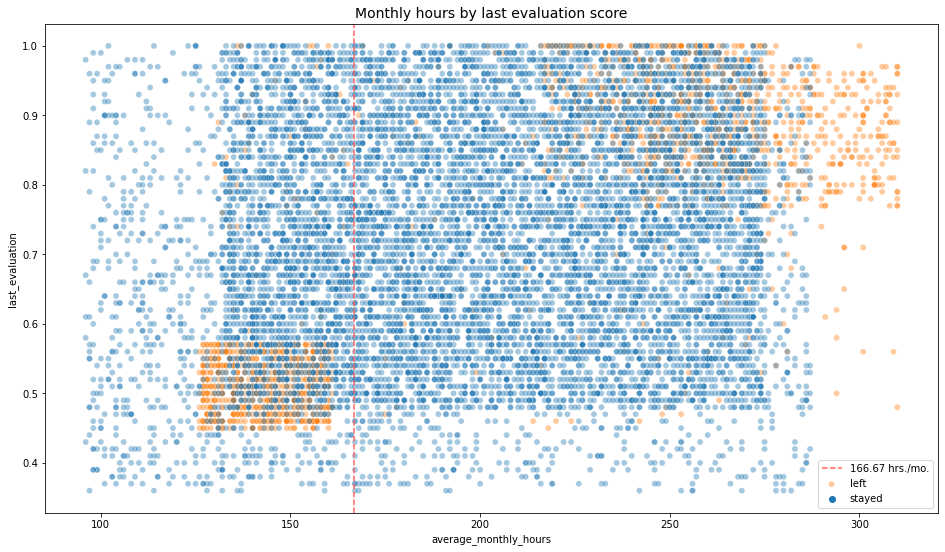

In [28]:
# Create scatterplot of `average_monthly_hours` vs `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

**Observations:**

1. There are two notable groups of employees who left: overworked employees who performed well, and employees who worked slightly under normal hours and had lower evaluation scores.

2. There is some correlation between hours worked and evaluation score, though working long hours doesn't necessarily guarantee a good evaluation score.

Next, I'll examine whether employees who worked very long hours were promoted in the last five years.

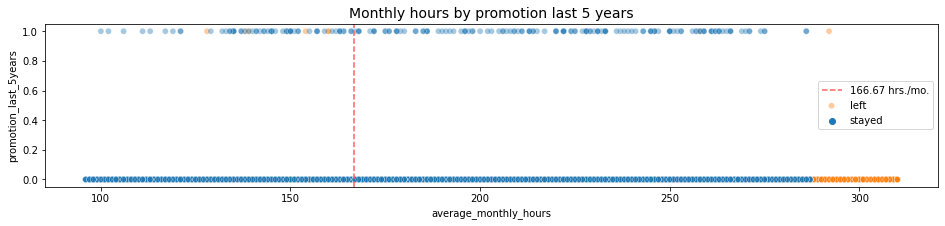

In [29]:
# Create scatterplot of `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

**Observations:**
1. Very few employees who were promoted in the last five years left.

2. Promotions came from a wide range of hours worked; though of the top level of hours worked, very few were promoted.

3. Nearly all of the employees who were working the longest hours left.

Next, I'll inspect how employees who left were distributed across departments, starting by getting the total counts from each department.

In [30]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

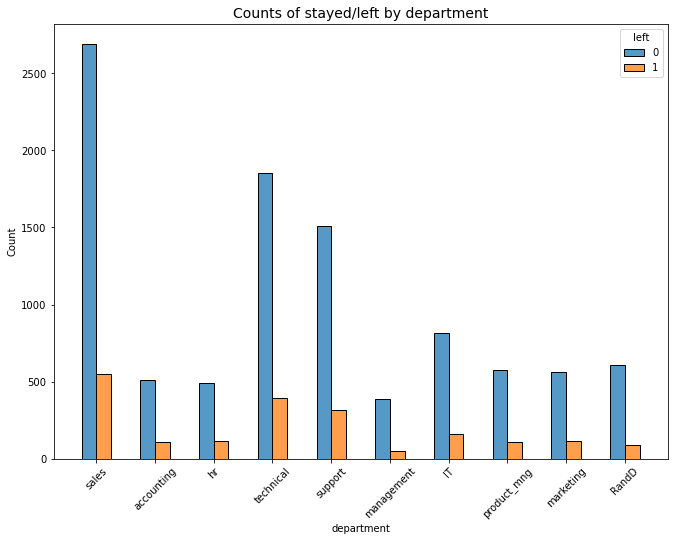

In [31]:
# Create a histogram, color-coded for employees who left vs stayed
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

**Observation:** Employees who left seemed to come from all departments, proportionately.

Next, I'll check all of the variables for strong correlations using a heatmap.

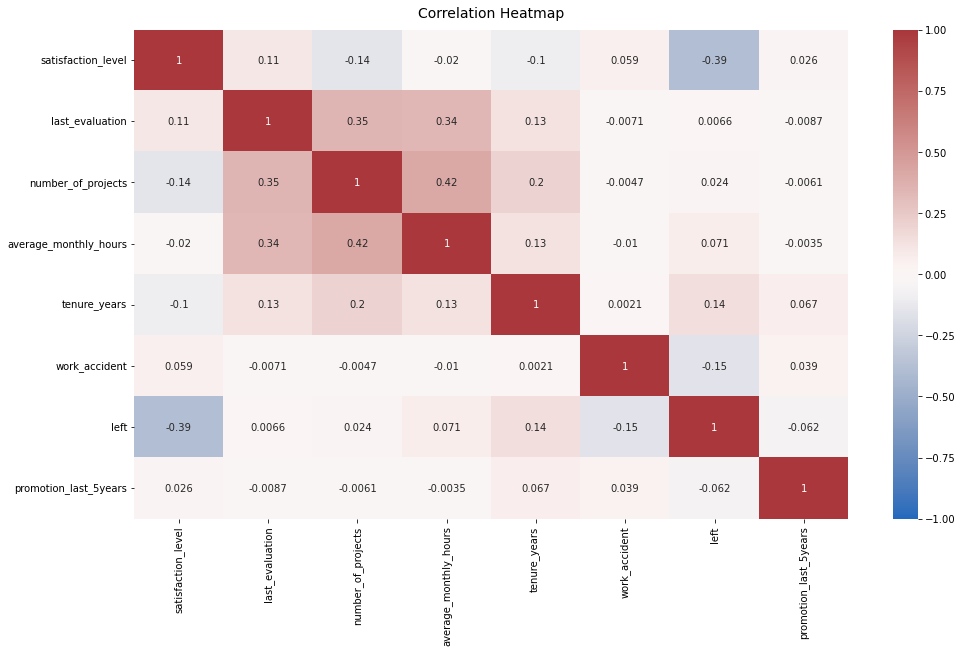

In [32]:
# Plot the correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

**Observations:**
1. Number of projects, monthly hours, and evaluation scores all have some positive correlation with each other.

2. Low satisfaction is correlated with employees leaving.

### Key Observations

1. A very large portion of employees work over the normal number of hours per month.

2. The most notable groups of employees who left the company had either a very high amount of average hours worked per month, or a slightly less than normal amount of hours worked per month. In either case, both groups reported low job satisfaction.

3. Employees who left all had six or less years of tenure, with most who left having three years of tenure. Employees who left and had four years of tenure were particularly dissatisfied.

4. There are two notable groups of employees who left: overworked employees who performed well, and employees who worked slightly under normal hours and had lower evaluation scores.

5. Very few employees who were promoted in the last five years left.

6. Nearly all of the employees who were working the longest hours were not promoted and also left the company.

### Conclusion

Whether an employee leaves the company is tied to longer working hours, many projects, and overall low job satisfaction.

Employees who worked many hours tended to receive good performance reviews, but many were still dissatisfied and left - especially those who worked the longest hours and were not promoted within the last 5 years.

A notable portion of employees who left had worked fewer than normal hours and received poor performance reviews. This could represent employees who were fired due to poor performance. This could be confirmed by capturing the reason for leaving (fired, quit voluntarily, etc.) in the HR dataset.